In [1]:
!pip install catboost
import numpy as np    #for mathematical operations
from catboost import Pool, CatBoostRegressor   #internal data format
import pandas as pd   #for data analysis and machine learning task
import numpy as np
import seaborn as sns    #for interactive graphs  
from sklearn.model_selection import train_test_split  #for splitting data into train and test
from sklearn.metrics import mean_squared_error  

You should consider upgrading via the 'C:\Users\raahi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
path = "koldataset_smoted.csv" 
air = pd.read_csv(path) #read dataset csv file
air


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Kolkata,16/06/2018,47.550000,128.660000,6.010000,24.890000,24.510000,7.400000,0.720000,7.300000,27.240000,2.140000,0.810000,119.000000,Moderate
1,Kolkata,18/06/2018,50.100000,105.680000,3.230000,33.280000,36.500000,8.550000,1.470000,3.020000,72.280000,1.970000,2.620000,107.000000,Moderate
2,Kolkata,19/06/2018,39.250000,87.240000,2.600000,30.860000,33.450000,12.060000,1.350000,1.930000,81.120000,1.590000,2.470000,148.000000,Moderate
3,Kolkata,20/06/2018,24.440000,53.190000,5.770000,38.030000,43.790000,9.140000,1.700000,6.880000,49.580000,2.020000,3.130000,94.000000,Satisfactory
4,Kolkata,21/06/2018,31.680000,60.160000,4.460000,38.390000,43.040000,6.520000,1.420000,1.310000,13.470000,3.760000,5.520000,100.000000,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,Kolkata,27/03/2020,46.072488,83.492185,5.013499,16.042440,20.619494,18.214277,0.543591,11.022506,61.501444,3.594572,7.002216,106.973029,Moderate
1524,Kolkata,27/03/2020,41.995080,74.349154,5.033806,17.391597,21.148212,18.751876,0.540000,9.732911,65.772872,3.526221,6.667443,105.750768,Moderate
1525,Kolkata,27/03/2020,43.365973,70.465271,5.039958,13.906713,18.917425,18.295288,0.553930,9.751165,65.808525,2.960702,6.755721,106.715756,Moderate
1526,Kolkata,11/03/2020,60.526591,91.076684,6.431950,13.262554,17.935028,17.574548,0.490613,9.153934,67.126714,3.678460,7.505300,114.277272,Moderate


In [3]:
X=air[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene"]]
y=air["AQI"]

In [4]:
y.shape #dimension of y axis

(1528,)

splitting dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42) 
#random_state-> selection of random combination of test and train
#test_size-> size of the test data sample

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler() #standardize y values
X_train = sc_x.fit_transform(X_train)     #use fit_transform for train and transform for test
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))  #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1)) #rows=unknown, column=1

In [7]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features=None) #Catboost uses pooling for faster execution
test_pool = Pool(X_test,
                 y_test,
                 cat_features=None) 

In [8]:
model = CatBoostRegressor(iterations=1500, #setting number of iterations
                          depth=10, #regression depth is set -  the regression depth of a hyperplane  is the smallest number of residuals that need to change sign to make  a nonfit
                          learning_rate = 0.01, #the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
                          loss_function='RMSE', #loss function is the function that computes the distance between the current output of the algorithm and the expected output.
                          eval_metric = 'RMSE', #evaluation metric
                          random_seed = 55, #random seed value while creating training and test data set
                          od_type = "Iter", #overfitting detector - to stop after given number of iterations
                          metric_period = 1, #metrics to be calculated after every 1 iteration
                          od_wait = 20) #The number of iterations to continue the training after the iteration with the optimal metric value

In [9]:
model.fit(train_pool)

0:	learn: 0.9913862	total: 166ms	remaining: 4m 8s
1:	learn: 0.9825190	total: 198ms	remaining: 2m 28s
2:	learn: 0.9740678	total: 235ms	remaining: 1m 57s
3:	learn: 0.9655319	total: 267ms	remaining: 1m 39s
4:	learn: 0.9569559	total: 300ms	remaining: 1m 29s
5:	learn: 0.9487525	total: 309ms	remaining: 1m 16s
6:	learn: 0.9404339	total: 343ms	remaining: 1m 13s
7:	learn: 0.9321876	total: 375ms	remaining: 1m 10s
8:	learn: 0.9239029	total: 412ms	remaining: 1m 8s
9:	learn: 0.9160154	total: 450ms	remaining: 1m 7s
10:	learn: 0.9081209	total: 484ms	remaining: 1m 5s
11:	learn: 0.8998814	total: 517ms	remaining: 1m 4s
12:	learn: 0.8921356	total: 550ms	remaining: 1m 2s
13:	learn: 0.8845440	total: 583ms	remaining: 1m 1s
14:	learn: 0.8767162	total: 631ms	remaining: 1m 2s
15:	learn: 0.8692185	total: 671ms	remaining: 1m 2s
16:	learn: 0.8618778	total: 704ms	remaining: 1m 1s
17:	learn: 0.8542421	total: 737ms	remaining: 1m
18:	learn: 0.8466777	total: 769ms	remaining: 60s
19:	learn: 0.8392982	total: 802ms	remai

164:	learn: 0.2535879	total: 5.88s	remaining: 47.5s
165:	learn: 0.2516773	total: 5.91s	remaining: 47.5s
166:	learn: 0.2498730	total: 5.94s	remaining: 47.4s
167:	learn: 0.2480039	total: 5.97s	remaining: 47.4s
168:	learn: 0.2461553	total: 6.01s	remaining: 47.3s
169:	learn: 0.2442908	total: 6.04s	remaining: 47.2s
170:	learn: 0.2425667	total: 6.07s	remaining: 47.2s
171:	learn: 0.2407581	total: 6.11s	remaining: 47.2s
172:	learn: 0.2389507	total: 6.14s	remaining: 47.1s
173:	learn: 0.2371947	total: 6.17s	remaining: 47.1s
174:	learn: 0.2354757	total: 6.21s	remaining: 47s
175:	learn: 0.2337973	total: 6.24s	remaining: 47s
176:	learn: 0.2322574	total: 6.28s	remaining: 47s
177:	learn: 0.2305937	total: 6.31s	remaining: 46.9s
178:	learn: 0.2289633	total: 6.35s	remaining: 46.9s
179:	learn: 0.2273613	total: 6.38s	remaining: 46.8s
180:	learn: 0.2257687	total: 6.42s	remaining: 46.8s
181:	learn: 0.2242120	total: 6.45s	remaining: 46.7s
182:	learn: 0.2226429	total: 6.49s	remaining: 46.7s
183:	learn: 0.2210

325:	learn: 0.1076138	total: 11.4s	remaining: 41.1s
326:	learn: 0.1072808	total: 11.5s	remaining: 41.1s
327:	learn: 0.1069783	total: 11.5s	remaining: 41.1s
328:	learn: 0.1066425	total: 11.5s	remaining: 41s
329:	learn: 0.1063211	total: 11.6s	remaining: 41s
330:	learn: 0.1060478	total: 11.6s	remaining: 40.9s
331:	learn: 0.1057295	total: 11.6s	remaining: 40.9s
332:	learn: 0.1054090	total: 11.7s	remaining: 40.8s
333:	learn: 0.1051000	total: 11.7s	remaining: 40.8s
334:	learn: 0.1047795	total: 11.7s	remaining: 40.8s
335:	learn: 0.1044262	total: 11.8s	remaining: 40.7s
336:	learn: 0.1041231	total: 11.8s	remaining: 40.7s
337:	learn: 0.1037939	total: 11.8s	remaining: 40.6s
338:	learn: 0.1034904	total: 11.8s	remaining: 40.6s
339:	learn: 0.1032272	total: 11.9s	remaining: 40.5s
340:	learn: 0.1029514	total: 11.9s	remaining: 40.5s
341:	learn: 0.1026715	total: 11.9s	remaining: 40.5s
342:	learn: 0.1023880	total: 12s	remaining: 40.4s
343:	learn: 0.1021262	total: 12s	remaining: 40.4s
344:	learn: 0.101847

485:	learn: 0.0783333	total: 16.9s	remaining: 35.3s
486:	learn: 0.0782106	total: 16.9s	remaining: 35.2s
487:	learn: 0.0781103	total: 17s	remaining: 35.2s
488:	learn: 0.0780129	total: 17s	remaining: 35.2s
489:	learn: 0.0779225	total: 17s	remaining: 35.1s
490:	learn: 0.0778227	total: 17.1s	remaining: 35.1s
491:	learn: 0.0777314	total: 17.1s	remaining: 35.1s
492:	learn: 0.0776313	total: 17.2s	remaining: 35s
493:	learn: 0.0775525	total: 17.2s	remaining: 35s
494:	learn: 0.0774574	total: 17.2s	remaining: 35s
495:	learn: 0.0773626	total: 17.3s	remaining: 34.9s
496:	learn: 0.0772720	total: 17.3s	remaining: 34.9s
497:	learn: 0.0771662	total: 17.3s	remaining: 34.8s
498:	learn: 0.0770847	total: 17.3s	remaining: 34.8s
499:	learn: 0.0769980	total: 17.4s	remaining: 34.8s
500:	learn: 0.0769195	total: 17.4s	remaining: 34.7s
501:	learn: 0.0768320	total: 17.5s	remaining: 34.7s
502:	learn: 0.0767409	total: 17.5s	remaining: 34.7s
503:	learn: 0.0766360	total: 17.5s	remaining: 34.6s
504:	learn: 0.0765349	to

648:	learn: 0.0656545	total: 22.5s	remaining: 29.6s
649:	learn: 0.0655823	total: 22.6s	remaining: 29.5s
650:	learn: 0.0655310	total: 22.6s	remaining: 29.5s
651:	learn: 0.0654714	total: 22.6s	remaining: 29.4s
652:	learn: 0.0654175	total: 22.7s	remaining: 29.4s
653:	learn: 0.0653533	total: 22.7s	remaining: 29.4s
654:	learn: 0.0653151	total: 22.7s	remaining: 29.3s
655:	learn: 0.0652609	total: 22.8s	remaining: 29.3s
656:	learn: 0.0652112	total: 22.8s	remaining: 29.3s
657:	learn: 0.0651678	total: 22.8s	remaining: 29.2s
658:	learn: 0.0651148	total: 22.9s	remaining: 29.2s
659:	learn: 0.0650630	total: 22.9s	remaining: 29.2s
660:	learn: 0.0650169	total: 22.9s	remaining: 29.1s
661:	learn: 0.0649654	total: 23s	remaining: 29.1s
662:	learn: 0.0648914	total: 23s	remaining: 29.1s
663:	learn: 0.0648490	total: 23s	remaining: 29s
664:	learn: 0.0647906	total: 23.1s	remaining: 29s
665:	learn: 0.0647311	total: 23.1s	remaining: 28.9s
666:	learn: 0.0646734	total: 23.1s	remaining: 28.9s
667:	learn: 0.0646291	

809:	learn: 0.0576259	total: 28s	remaining: 23.8s
810:	learn: 0.0575789	total: 28s	remaining: 23.8s
811:	learn: 0.0575495	total: 28s	remaining: 23.7s
812:	learn: 0.0575069	total: 28.1s	remaining: 23.7s
813:	learn: 0.0574764	total: 28.1s	remaining: 23.7s
814:	learn: 0.0574473	total: 28.1s	remaining: 23.6s
815:	learn: 0.0573974	total: 28.2s	remaining: 23.6s
816:	learn: 0.0573732	total: 28.2s	remaining: 23.6s
817:	learn: 0.0573098	total: 28.2s	remaining: 23.5s
818:	learn: 0.0572611	total: 28.3s	remaining: 23.5s
819:	learn: 0.0572343	total: 28.3s	remaining: 23.5s
820:	learn: 0.0571798	total: 28.3s	remaining: 23.4s
821:	learn: 0.0571426	total: 28.4s	remaining: 23.4s
822:	learn: 0.0571133	total: 28.4s	remaining: 23.4s
823:	learn: 0.0570752	total: 28.4s	remaining: 23.3s
824:	learn: 0.0570580	total: 28.5s	remaining: 23.3s
825:	learn: 0.0570122	total: 28.5s	remaining: 23.3s
826:	learn: 0.0569591	total: 28.5s	remaining: 23.2s
827:	learn: 0.0569299	total: 28.6s	remaining: 23.2s
828:	learn: 0.0568

970:	learn: 0.0515969	total: 33.6s	remaining: 18.3s
971:	learn: 0.0515698	total: 33.6s	remaining: 18.3s
972:	learn: 0.0515484	total: 33.7s	remaining: 18.2s
973:	learn: 0.0515226	total: 33.7s	remaining: 18.2s
974:	learn: 0.0514798	total: 33.7s	remaining: 18.2s
975:	learn: 0.0514406	total: 33.8s	remaining: 18.1s
976:	learn: 0.0514137	total: 33.8s	remaining: 18.1s
977:	learn: 0.0513535	total: 33.8s	remaining: 18.1s
978:	learn: 0.0513278	total: 33.9s	remaining: 18s
979:	learn: 0.0512890	total: 33.9s	remaining: 18s
980:	learn: 0.0512452	total: 34s	remaining: 18s
981:	learn: 0.0512003	total: 34s	remaining: 18s
982:	learn: 0.0511836	total: 34.1s	remaining: 17.9s
983:	learn: 0.0511391	total: 34.1s	remaining: 17.9s
984:	learn: 0.0510795	total: 34.2s	remaining: 17.9s
985:	learn: 0.0510404	total: 34.2s	remaining: 17.8s
986:	learn: 0.0510103	total: 34.3s	remaining: 17.8s
987:	learn: 0.0509738	total: 34.3s	remaining: 17.8s
988:	learn: 0.0509500	total: 34.3s	remaining: 17.7s
989:	learn: 0.0509261	to

1128:	learn: 0.0461595	total: 39.2s	remaining: 12.9s
1129:	learn: 0.0461111	total: 39.3s	remaining: 12.9s
1130:	learn: 0.0460796	total: 39.3s	remaining: 12.8s
1131:	learn: 0.0460589	total: 39.3s	remaining: 12.8s
1132:	learn: 0.0460168	total: 39.4s	remaining: 12.8s
1133:	learn: 0.0459700	total: 39.4s	remaining: 12.7s
1134:	learn: 0.0459480	total: 39.4s	remaining: 12.7s
1135:	learn: 0.0459196	total: 39.5s	remaining: 12.6s
1136:	learn: 0.0458996	total: 39.5s	remaining: 12.6s
1137:	learn: 0.0458608	total: 39.5s	remaining: 12.6s
1138:	learn: 0.0458383	total: 39.6s	remaining: 12.5s
1139:	learn: 0.0457964	total: 39.6s	remaining: 12.5s
1140:	learn: 0.0457709	total: 39.6s	remaining: 12.5s
1141:	learn: 0.0457203	total: 39.7s	remaining: 12.4s
1142:	learn: 0.0456691	total: 39.7s	remaining: 12.4s
1143:	learn: 0.0456362	total: 39.7s	remaining: 12.4s
1144:	learn: 0.0456059	total: 39.8s	remaining: 12.3s
1145:	learn: 0.0455633	total: 39.8s	remaining: 12.3s
1146:	learn: 0.0455278	total: 39.8s	remaining:

1285:	learn: 0.0415015	total: 44.6s	remaining: 7.42s
1286:	learn: 0.0414910	total: 44.6s	remaining: 7.39s
1287:	learn: 0.0414517	total: 44.7s	remaining: 7.35s
1288:	learn: 0.0414380	total: 44.7s	remaining: 7.32s
1289:	learn: 0.0414155	total: 44.7s	remaining: 7.28s
1290:	learn: 0.0413931	total: 44.8s	remaining: 7.25s
1291:	learn: 0.0413603	total: 44.8s	remaining: 7.21s
1292:	learn: 0.0413438	total: 44.8s	remaining: 7.17s
1293:	learn: 0.0413161	total: 44.9s	remaining: 7.14s
1294:	learn: 0.0412827	total: 44.9s	remaining: 7.11s
1295:	learn: 0.0412650	total: 44.9s	remaining: 7.07s
1296:	learn: 0.0412289	total: 44.9s	remaining: 7.04s
1297:	learn: 0.0412016	total: 45s	remaining: 7s
1298:	learn: 0.0411830	total: 45s	remaining: 6.96s
1299:	learn: 0.0411651	total: 45s	remaining: 6.93s
1300:	learn: 0.0411200	total: 45.1s	remaining: 6.89s
1301:	learn: 0.0410945	total: 45.1s	remaining: 6.86s
1302:	learn: 0.0410784	total: 45.1s	remaining: 6.83s
1303:	learn: 0.0410499	total: 45.2s	remaining: 6.79s
13

1444:	learn: 0.0375812	total: 50.1s	remaining: 1.91s
1445:	learn: 0.0375509	total: 50.1s	remaining: 1.87s
1446:	learn: 0.0375292	total: 50.2s	remaining: 1.84s
1447:	learn: 0.0375111	total: 50.2s	remaining: 1.8s
1448:	learn: 0.0374970	total: 50.2s	remaining: 1.77s
1449:	learn: 0.0374563	total: 50.3s	remaining: 1.73s
1450:	learn: 0.0374109	total: 50.3s	remaining: 1.7s
1451:	learn: 0.0373867	total: 50.3s	remaining: 1.66s
1452:	learn: 0.0373439	total: 50.4s	remaining: 1.63s
1453:	learn: 0.0373117	total: 50.4s	remaining: 1.59s
1454:	learn: 0.0373021	total: 50.4s	remaining: 1.56s
1455:	learn: 0.0372816	total: 50.5s	remaining: 1.52s
1456:	learn: 0.0372682	total: 50.5s	remaining: 1.49s
1457:	learn: 0.0372495	total: 50.5s	remaining: 1.46s
1458:	learn: 0.0372261	total: 50.6s	remaining: 1.42s
1459:	learn: 0.0372011	total: 50.6s	remaining: 1.39s
1460:	learn: 0.0371804	total: 50.6s	remaining: 1.35s
1461:	learn: 0.0371565	total: 50.7s	remaining: 1.32s
1462:	learn: 0.0371380	total: 50.7s	remaining: 1

In [10]:
preds = model.predict(test_pool)

In [11]:
print(preds)

[-1.19417147e+00 -1.00680997e+00  2.56114800e-01 -8.89214051e-01
 -1.15298616e+00  1.60966450e+00 -2.39899162e-01 -1.40453509e-01
 -2.09352425e-01  4.68281987e-01 -3.50224292e-01  1.56069502e+00
 -5.83201297e-01 -2.46369348e-01 -3.66666407e-01  1.09246441e+00
 -1.21053950e+00 -1.16814534e+00 -9.18460375e-01  5.24149817e-01
 -1.17389631e+00 -8.83264531e-01 -3.61250131e-01  4.90404908e-01
 -1.18690619e+00 -1.08949356e+00  1.16938920e+00  9.68242687e-01
 -1.17582334e+00  1.59757426e+00  6.49502324e-02 -1.05588695e+00
 -1.20915011e+00 -4.86012647e-01  1.50149655e+00  1.56384878e+00
  1.57724052e+00 -1.02650247e+00 -1.17794379e+00 -3.95040121e-01
  1.57413633e+00  1.62250463e+00  3.78656100e-01  1.58648991e+00
 -9.91226017e-01 -5.63268060e-01 -1.07532712e+00 -1.16652603e+00
 -1.17617461e+00  1.03797285e+00  4.16691710e-01 -1.07171836e+00
 -9.79940475e-01 -6.27732074e-01 -2.58548060e-01 -1.02231458e+00
 -9.93980858e-01 -8.94670299e-01 -1.20777677e+00  2.38965667e-01
  1.54828128e+00 -1.79350

calculating metrics

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,preds)
mean_error = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)


R2 SCORE is 0.988726541932146
mean_sqrd_error is  0.011156900801312288
Root mean squared error of is 0.10562623159666489
Mean Absolute error is 0.06834368671860146
Accuracy is 0.9316563132813985


In [13]:
#feature importance- giving score to each feature to determine their importance
prediction_diff = model.get_feature_importance(train_pool,
                                               prettified=True)  #the difference between the metric obtained using the model in normal scenario and model without this feature

In [14]:
prediction_diff

,Feature Id,Importances
0,0,34.532435
1,1,27.959893
2,3,5.592585
3,5,5.197946
4,6,4.581837
5,8,4.499344
6,10,4.046421
7,7,3.848510
8,9,3.631455
9,4,3.096274


plotting graphs

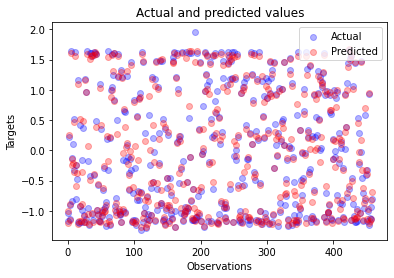

In [15]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3) #alpha is for transparency
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend() #A legend is an area describing the elements of the graph.
plt.show()

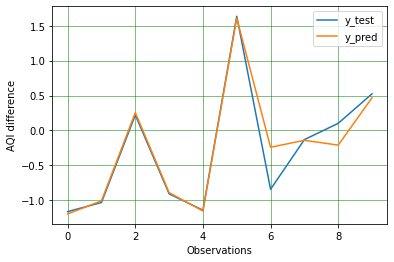

In [16]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(preds.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()


C:\Users\raahi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


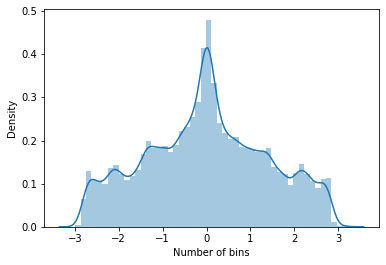

In [17]:
fig = sns.distplot(y_test-preds)
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig)

In [18]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten() #copying old array collapsed in 1D
result["PREDICTED AQI"] = preds
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)


,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-1.161420,-1.194171,0.032752,Accurate,-2.819957
1,-1.030505,-1.006810,-0.023695,Accurate,-2.299341
2,0.222010,0.256115,-0.034105,Accurate,15.361753
3,-0.906863,-0.889214,-0.017649,Accurate,-1.946122
4,-1.141026,-1.152986,0.011960,Accurate,-1.048156
5,1.635647,1.609665,0.025983,Accurate,1.588541
6,-0.841405,-0.239899,-0.601506,Inaccurate,-71.488270
7,-0.130796,-0.140454,0.009657,Accurate,-7.383538
8,0.102749,-0.209352,0.312101,Accurate,303.751270
9,0.525054,0.468282,0.056772,Accurate,10.812645
